<a href="https://colab.research.google.com/github/mtsilimos/ETH/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from ultralytics import YOLO
model = YOLO("yolo-Weights/yolov8n.pt")

In [42]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [55]:
pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=3b8fe0b2cd05f86ac2fbb0fa5a4846c888932f5108d007dd5b3172bf2ba0ff62
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [60]:
#importing models from supergradients' training module
from super_gradients.training import models

The console stream is logged into /root/sg_logs/console.log


[2023-12-08 15:57:53] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-08 15:57:54] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-08 15:57:57] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-08 15:57:57] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-08 15:57:57] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-08 15:57:57] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-08 15:57:57] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-12-08 15:57:57] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-08 15:57:57] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not fo

In [61]:
# Initializing model
yolo_nas = models.get("yolo_nas_l", pretrained_weights = "coco")

[2023-12-08 15:58:06] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:09<00:00, 28.8MB/s]
[2023-12-08 15:58:17] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [62]:
# Yolo NAS architecture
!pip install torchinfo
from torchinfo import summary

summary(model = yolo_nas,
       input_size = (16,3,640,640),
       col_names = ['input_size',
                   'output_size',
                   'num_params',
                   'trainable'],
       col_width = 20,
       row_settings = ['var_names'])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-12-08 16:34:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


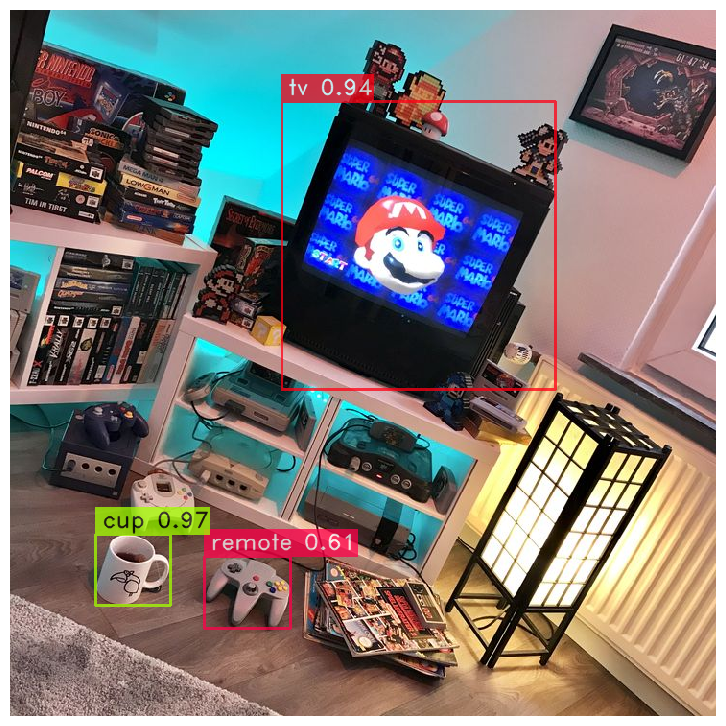

In [72]:
image = "https://i.pinimg.com/736x/b4/29/48/b42948ef9202399f13d6e6b3b8330b20.jpg"
yolo_nas.predict(image, conf = 0.50).show()

In [65]:
from super_gradients.training import models
#Retrieve the model
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-12-08 16:17:20] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-08 16:17:21] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-12-08 16:18:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


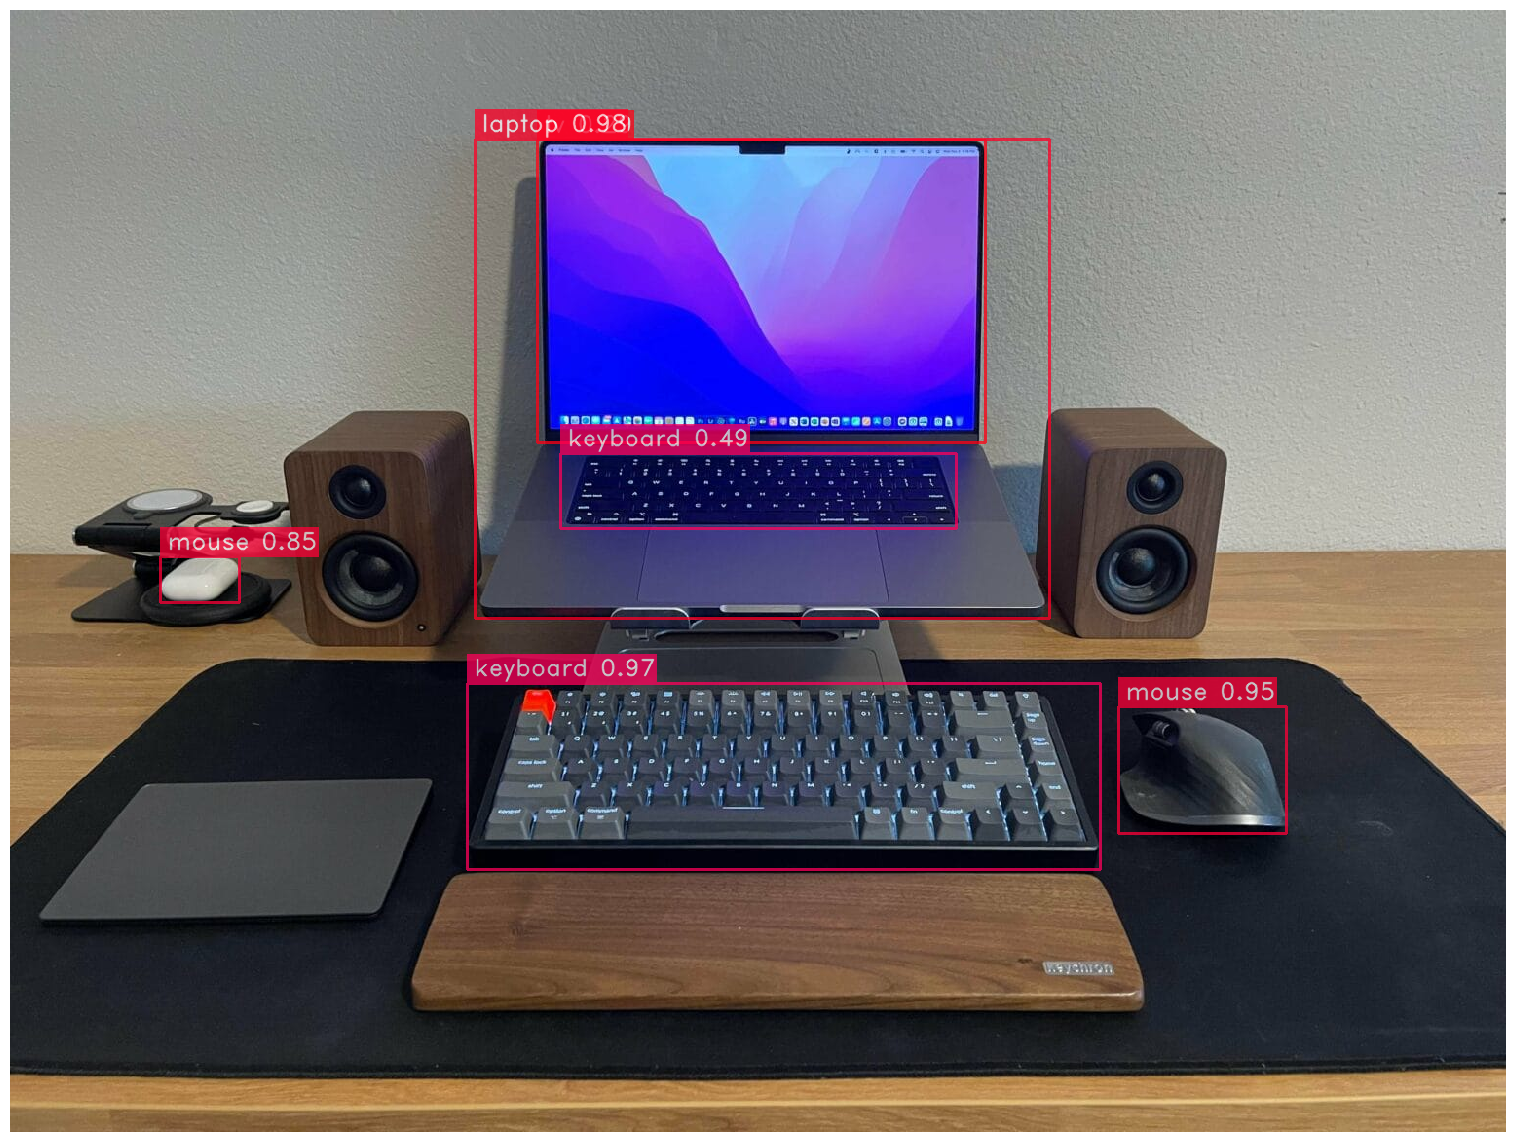

In [68]:
url_1 = 'https://www.cultofmac.com/wp-content/uploads/2021/11/Setup-Cypher_27-Reddit-Nov-4-2021-1536x1152.jpg'
yolo_nas_l.predict(url_1).show()